# Phylogenetic Analysis

In [1]:
import numpy as np
import pickle as pkl
import os, sys
import gzip
cwd = os.getcwd()
folder = os.path.basename(cwd)
cwd = os.path.dirname(cwd)
folder = os.path.basename(cwd)
ROOT = os.path.join(cwd)

sys.path.append(ROOT)

from analysis import utils
from core.population import Archive
from parameters import params
from environments.environments import *
import matplotlib.pyplot as plt

Root directory /home/giuseppe/src/cmans


## Load Data

In [2]:
env_type = 'RW'

if env_type == 'RW':
    env = 'Walker2D'
elif env_type == 'Dummy':
    env = 'Dummy'
elif env_type == 'CB':
    env = 'CollectBall'
elif env_type == 'AM':
    env = 'AntMaze'
elif env_type == 'arm':
    env = 'NDofArm'
else:
    raise ValueError('Wrong environment type given: {}'.format(env_type))

EXP_ROOT = '/mnt/7e0bad1b-406b-4582-b7a1-84327ae60fc4/cmans/'
    
exp_path = os.path.join(ROOT, 'experiment_data')
# exp_path = EXP_ROOT
exp_types = ['NS']#, 'NSGA-II', 'CMA-NS', 'CMA-NS_prob']
paths = []

avail_exps = []
for exp_type in exp_types:
#     path = os.path.join(exp_path, "{}/{}_{}".format(env, env, exp_type))
    path = os.path.join(exp_path, "{}_{}".format(env, exp_type))

    if not os.path.exists(path):
        path = None
        print("No {} experiment for {} env.".format(exp_type, env))
        continue
    paths.append(path)
    avail_exps.append(exp_type)
exp_types = avail_exps

In [20]:
trees = {}
expl_archives = {}
rew_archives = {}
for exp, path in zip(exp_types, paths):
    runs = utils.get_runs_list(path)
    run_tree = []
    run_expl_archives = []
    run_rew_archives = []
    
    for run in runs:
        tree_path = os.path.join(path, run, 'analyzed_data/phyl_tree.pkl')
        
        if os.path.exists(tree_path):
            with gzip.open(tree_path) as f: 
                data = pkl.load(f)    
            run_tree.append(data)
            
        else:
            print("{} does not exists.".format(tree_path))
        if len(run_tree) != 0:
            trees[exp] = run_tree
        
        exp_archive_path = os.path.join(path, run, 'archive_final.pkl')
        if exp == 'CMA-NS':
            rew_archive_path = os.path.join(path, run, 'rew_archive_final.pkl')
        else: rew_archive_path = exp_archive_path

        
        if os.path.exists(exp_archive_path):
            archive = Archive(params)
            archive.load(exp_archive_path)
            run_expl_archives.append(archive)
        else:
            print("{} does not exists.".format(exp_archive_path))
        
        if not rew_archive_path == exp_archive_path:
            if os.path.exists(rew_archive_path):
                archive = Archive(params)
                archive.load(rew_archive_path)
                run_rew_archives.append(archive)
            else:
                print("{} does not exists.".format(rew_archive_path))
            
    
    expl_archives[exp] = run_expl_archives
    if not rew_archive_path == exp_archive_path:
        rew_archives[exp] = run_rew_archives
    else:
        rew_archives = expl_archives

In [21]:
grid_parameters = registered_envs[env]['grid']
best_run = {}
for exp in exp_types:
    best_run[exp] = 0
exp_types = list(trees.keys())

## Plot number of rewarding lineages by generation

In [26]:
for exp in archives:
    for arch in archives[exp]:
        exploring_ancestors = np.stack(arch['ancestor'])
#         unique, counts = np.unique(exploring_ancestors, return_counts=True)
#         exploring_ancestors = dict(zip(unique, counts))
        
        anc_idx = params.archive_stored_info.index('ancestor')
        rew_idx = params.archive_stored_info.index('reward')
        rewarding_ancestors = np.stack([agent[anc_idx] for agent in arch if agent[rew_idx]>0])
#         unique, counts = np.unique(rewarding_ancestors, return_counts=True)
#         rewarding_ancestors = dict(zip(unique, counts))
         
    

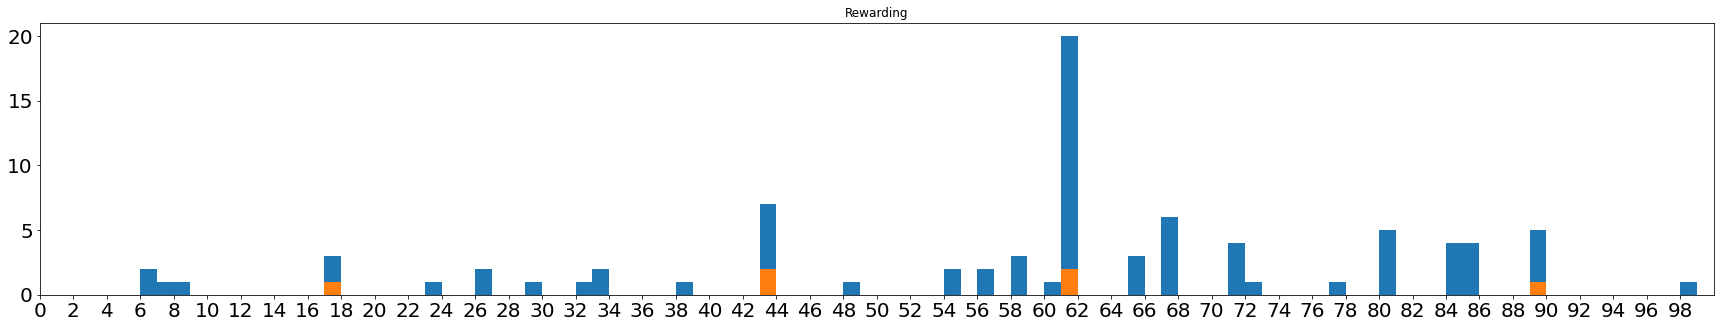

In [51]:
fig, axes = plt.subplots(1, 1, figsize=(30, 5))

axes = [axes]
axes[0].hist(exploring_ancestors, bins=range(params.pop_size))
axes[0].set_xlim(0, params.pop_size)
axes[0].set_title('Exploring')

axes[0].hist(rewarding_ancestors, bins=range(params.pop_size))
axes[0].set_xlim(0, params.pop_size)
axes[0].set_title('Rewarding')
plt.xticks(range(0, params.pop_size, 2));
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)


In [28]:
rewarding_ancestors

array([43, 61, 43, 17, 61, 89])

In [29]:
exploring_ancestors

array([32, 48, 77,  7, 26, 33, 99, 80, 85, 71, 60,  8, 80,  6, 26, 67, 72,
       58, 54, 67, 61, 29, 84, 43, 85,  6, 33, 65, 71, 23, 43, 84, 38, 43,
       65, 61, 54, 84, 85, 61, 89, 89, 84, 80, 65, 89, 89, 67, 71, 67, 61,
       61, 85, 17, 61, 43, 17, 61, 61, 43, 17, 71, 80, 61, 80, 43, 61, 61,
       61, 61, 56, 61, 43, 61, 58, 58, 56, 61, 67, 67, 61, 61, 89, 61, 61])

In [ ]:
aaa= []
for agent in arch_run:
    try: aaa.append(tree_run['id'][agent[4]])
    except: continue

In [ ]:
len(aaa)

In [ ]:
arch_run.size

In [ ]:
fig, axes = plt.subplots(1, len(exp_types), figsize=(len(exp_types)*10, 10))

        

## Plot lineages

### Find BD points for lineages

In [ ]:
exp_bd = {}
for exp in exp_lineages:
    tree_id = trees[exp][best_run[exp]]['id']
    lineages = exp_lineages[exp]
    bd_lineages = {}
    for ancestor in lineages:
        bd_lin = []
        
        for lineage in lineages[ancestor]:
            bds = []
            for agent in lineage:
                bds.append(tree_id[agent]['bd'])
            bd_lin.append(bds)
        if ancestor not in bd_lineages:
            bd_lineages[ancestor] = []
        bd_lineages[ancestor].append(bd_lin)        
    exp_bd[exp] = bd_lineages

In [ ]:
from matplotlib.patches import Rectangle


fig, axes = plt.subplots(1, len(exp_types), figsize=(len(exp_types)*10, 10))

for exp_idx, exp in enumerate(exp_types):
    print("Working on exp: {}".format(exp))
    if env_type == 'arm':
        goals = [Rectangle((0.2,0.2),0.05,0.05,linewidth=2,edgecolor='black',facecolor='none'),
                 Rectangle((0.8,0.8),0.05,0.05,linewidth=2,edgecolor='black',facecolor='none'),
                 Rectangle((0.8,0.2),0.05,0.05,linewidth=2,edgecolor='black',facecolor='none'),
                ]
    elif env_type == 'RW':
        goals = [Rectangle((0.75,0.75),0.05,0.05,linewidth=2,edgecolor='black',facecolor='none'),
                 Rectangle((-0.11,-0.11),0.01,0.01,linewidth=2,edgecolor='black',facecolor='none'),
                 Rectangle((0.3,0.2),0.01,0.02,linewidth=2,edgecolor='black',facecolor='none'),
                 Rectangle((-.98,0.9),0.08,0.08,linewidth=2,edgecolor='black',facecolor='none'),
                 Rectangle((-.9,-0.9),0.05,0.05,linewidth=2,edgecolor='black',facecolor='none'),
                 Rectangle((.5, -.6),0.1,0.1,linewidth=2,edgecolor='black',facecolor='none'),
                 Rectangle((0, -.75),0.1,0.05,linewidth=2,edgecolor='black',facecolor='none'),                
                 Rectangle((-.5, .7),0.05,0.05,linewidth=2,edgecolor='black',facecolor='none'),                
                 Rectangle((-.75, -.05),0.05,0.1,linewidth=2,edgecolor='black',facecolor='none'),                                
                ]
    else:
        goals = []
        
    points = exp_bd[exp]
    col = plt.cm.jet(np.linspace(0, 1, len(points)))    

    for lineage, c in zip(points, col):
        for p_path in points[lineage][0]:
            p_path = np.array(p_path)
            axes.plot(p_path[:, 0], p_path[:, 1], color=c)
            axes.scatter(p_path[:, 0], p_path[:, 1], color=c)
        
    for goal in goals:
        axes.add_patch(goal)
        
    axes.set_xlabel('x')
    axes.set_ylabel('y')
    axes.set_xlim(grid_parameters['min_coord'][0], grid_parameters['max_coord'][0])
    axes.set_ylim(grid_parameters['min_coord'][1], grid_parameters['max_coord'][1])